In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
filename = ("fifa.csv")
data = pd.read_csv(filename, sep=",", header=0, index_col=0)
data.drop(data.columns.difference(['Name','Age','Nationality','Overall','Club','Wage']), 1, inplace=True)

In [4]:
data.head()

,Name,Age,Nationality,Overall,Club,Wage
0,L. Messi,31,Argentina,94,FC Barcelona,€565K
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K
3,De Gea,27,Spain,91,Manchester United,€260K
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K


In [5]:
Chelsea_team = data['Club'] == 'Chelsea'
print(Chelsea_team.head)

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>


In [6]:
Chelsea_df = data[Chelsea_team]
print(Chelsea_df.shape)

(33, 6)


In [7]:
Chelsea_df.head()

,Name,Age,Nationality,Overall,Club,Wage
5,E. Hazard,27,Belgium,91,Chelsea,€340K
14,N. Kanté,27,France,89,Chelsea,€225K
69,Azpilicueta,28,Spain,86,Chelsea,€175K
121,Jorginho,26,Italy,84,Chelsea,€155K
140,Willian,29,Brazil,84,Chelsea,€175K


In [8]:
Chelsea_df['Wage'] = Chelsea_df['Wage'].str[1:]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
Chelsea_df['Wage'] = Chelsea_df['Wage'].str[:-1]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
Chelsea_df.head(33)

,Name,Age,Nationality,Overall,Club,Wage
5,E. Hazard,27,Belgium,91,Chelsea,340
14,N. Kanté,27,France,89,Chelsea,225
69,Azpilicueta,28,Spain,86,Chelsea,175
121,Jorginho,26,Italy,84,Chelsea,155
140,Willian,29,Brazil,84,Chelsea,175
176,M. Kovačić,24,Croatia,83,Chelsea,165
177,Kepa,23,Spain,83,Chelsea,84
200,Marcos Alonso,27,Spain,83,Chelsea,130
209,David Luiz,31,Brazil,83,Chelsea,130
219,Cesc Fàbregas,31,Spain,83,Chelsea,140


In [11]:
Chelsea_df.describe()

,Age,Overall
count,33.000000,33.000000
mean,25.212121,76.787879
std,5.504303,9.228887
min,17.000000,56.000000
25%,22.000000,72.000000
50%,25.000000,79.000000
75%,28.000000,83.000000
max,38.000000,91.000000


In [12]:
Chelsea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 5 to 16806
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


In [13]:
Chelsea_df['Wage'] = pd.to_numeric(Chelsea_df['Wage'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
Chelsea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 5 to 16806
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


In [15]:
Chelsea_df.describe()
Chelsea_df_average = Chelsea_df.groupby('Wage').mean()

In [16]:
print(Chelsea_df_average)

            Age    Overall
Wage                      
2     18.000000  56.000000
4     17.000000  58.000000
6     17.000000  59.000000
7     17.000000  61.000000
8     17.500000  63.000000
25    17.000000  70.000000
28    38.000000  72.000000
39    36.000000  76.000000
55    24.000000  72.000000
61    23.000000  75.000000
76    22.000000  77.000000
84    23.000000  83.000000
89    24.000000  79.000000
91    22.000000  81.000000
94    26.000000  79.000000
98    25.000000  79.000000
99    32.000000  80.000000
105   27.000000  78.000000
110   26.500000  80.500000
130   29.000000  83.000000
135   25.000000  82.000000
140   30.666667  82.333333
155   26.000000  84.000000
165   24.000000  83.000000
175   28.500000  85.000000
225   27.000000  89.000000
340   27.000000  91.000000


In [17]:
Liverpool_team = data['Club'] == 'Liverpool'
print(Liverpool_team.head)

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>


In [18]:
Liverpool_df = data[Liverpool_team]
print(Liverpool_df.shape)

(33, 6)


In [19]:
Liverpool_df.head()

,Name,Age,Nationality,Overall,Club,Wage
26,M. Salah,26,Egypt,88,Liverpool,€255K
58,S. Mané,26,Senegal,86,Liverpool,€195K
59,V. van Dijk,26,Netherlands,86,Liverpool,€165K
61,Roberto Firmino,26,Brazil,86,Liverpool,€195K
81,Alisson,25,Brazil,85,Liverpool,€115K


In [20]:
Liverpool_df['Wage'] = Liverpool_df['Wage'].str[1:]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
Liverpool_df['Wage'] = Liverpool_df['Wage'].str[:-1]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
Liverpool_df.head(33)

,Name,Age,Nationality,Overall,Club,Wage
26,M. Salah,26,Egypt,88,Liverpool,255
58,S. Mané,26,Senegal,86,Liverpool,195
59,V. van Dijk,26,Netherlands,86,Liverpool,165
61,Roberto Firmino,26,Brazil,86,Liverpool,195
81,Alisson,25,Brazil,85,Liverpool,115
118,Fabinho,24,Brazil,84,Liverpool,120
161,N. Keïta,23,Guinea,83,Liverpool,120
241,A. Robertson,24,Scotland,82,Liverpool,98
296,J. Henderson,28,England,82,Liverpool,125
302,G. Wijnaldum,27,Netherlands,82,Liverpool,130


In [23]:
Liverpool_df['Wage'] = pd.to_numeric(Liverpool_df['Wage'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
Liverpool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 26 to 15627
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


In [25]:
Liverpool_df_average = Liverpool_df.groupby('Wage').mean()

In [26]:
print(Liverpool_df_average)

            Age    Overall
Wage                      
3     19.000000  59.000000
7     18.000000  60.666667
8     19.500000  60.500000
9     21.000000  61.000000
17    21.000000  66.000000
36    19.000000  78.000000
37    20.000000  70.000000
61    21.000000  78.000000
62    24.000000  74.000000
76    27.500000  78.000000
83    23.000000  77.000000
94    25.500000  79.500000
98    24.000000  82.000000
99    26.000000  80.000000
110   30.000000  80.000000
115   26.500000  83.000000
120   26.333333  82.666667
125   28.000000  81.000000
130   26.500000  81.500000
165   26.000000  86.000000
195   26.000000  86.000000
255   26.000000  88.000000


In [27]:
City_team = data['Club'] == 'Manchester City'
print(City_team.head)

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4         True
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>


In [28]:
City_df = data[City_team]
print(City_df.shape)

(33, 6)


In [29]:
City_df.head()

,Name,Age,Nationality,Overall,Club,Wage
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K
13,David Silva,32,Spain,90,Manchester City,€285K
23,S. Agüero,30,Argentina,89,Manchester City,€300K
55,L. Sané,22,Germany,86,Manchester City,€195K
56,Bernardo Silva,23,Portugal,86,Manchester City,€180K


In [30]:
City_df['Wage'] = City_df['Wage'].str[1:]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
City_df['Wage'] = City_df['Wage'].str[:-1]

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
City_df.head(33)

,Name,Age,Nationality,Overall,Club,Wage
4,K. De Bruyne,27,Belgium,91,Manchester City,355
13,David Silva,32,Spain,90,Manchester City,285
23,S. Agüero,30,Argentina,89,Manchester City,300
55,L. Sané,22,Germany,86,Manchester City,195
56,Bernardo Silva,23,Portugal,86,Manchester City,180
57,Ederson,24,Brazil,86,Manchester City,125
60,R. Sterling,23,England,86,Manchester City,195
75,Fernandinho,33,Brazil,86,Manchester City,185
84,R. Mahrez,27,Algeria,85,Manchester City,205
89,N. Otamendi,30,Argentina,85,Manchester City,170


In [33]:
City_df['Wage'] = pd.to_numeric(City_df['Wage'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 4 to 17451
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.8+ KB


In [35]:
City_df_average = City_df.groupby('Wage').mean()

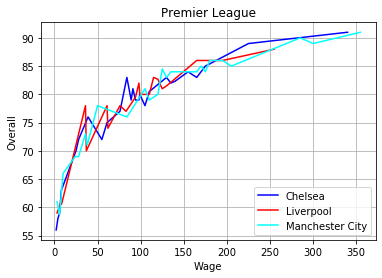

In [36]:
plt.plot(Chelsea_df_average.index, Chelsea_df_average['Overall'], color='blue', label='Chelsea')
plt.plot(Liverpool_df_average.index, Liverpool_df_average['Overall'], color='red', label='Liverpool')
plt.plot(City_df_average.index, City_df_average['Overall'], color='aqua', label='Manchester City')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Premier League')
plt.grid()
plt.legend()
plt.show()

In [37]:
Dortmund_team = data['Club'] == 'Borussia Dortmund'
print(Dortmund_team.head)
Dortmund_df = data[Dortmund_team]
print(Dortmund_df.shape)
Dortmund_df.head()
Dortmund_df['Wage'] = Dortmund_df['Wage'].str[1:]
Dortmund_df['Wage'] = Dortmund_df['Wage'].str[:-1]
Dortmund_df.head(33)
Dortmund_df.describe()
Dortmund_df.info()
Dortmund_df['Wage'] = pd.to_numeric(Dortmund_df['Wage'])
Dortmund_df_average = Dortmund_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(33, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 68 to 16279
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [38]:
RBL_team = data['Club'] == 'RB Leipzig'
print(RBL_team.head)
RBL_df = data[RBL_team]
print(RBL_df.shape)
RBL_df.head()
RBL_df['Wage'] = RBL_df['Wage'].str[1:]
RBL_df['Wage'] = RBL_df['Wage'].str[:-1]
RBL_df.head(33)
RBL_df.describe()
RBL_df.info()
RBL_df['Wage'] = pd.to_numeric(RBL_df['Wage'])
RBL_df_average = RBL_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(28, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 167 to 16286
Data columns (total 6 columns):
Name           28 non-null object
Age            28 non-null int64
Nationality    28 non-null object
Overall        28 non-null int64
Club           28 non-null object
Wage           28 non-null object
dtypes: int64(2), object(4)
memory usage: 1.5+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [39]:
Bayern_team = data['Club'] == 'FC Bayern München'
print(Bayern_team.head)
Bayern_df = data[Bayern_team]
print(Bayern_df.shape)
Bayern_df.head()
Bayern_df['Wage'] = Bayern_df['Wage'].str[1:]
Bayern_df['Wage'] = Bayern_df['Wage'].str[:-1]
Bayern_df.head(33)
Bayern_df.describe()
Bayern_df.info()
Bayern_df['Wage'] = pd.to_numeric(Bayern_df['Wage'])
Bayern_df_average = Bayern_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(29, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 10 to 16932
Data columns (total 6 columns):
Name           29 non-null object
Age            29 non-null int64
Nationality    29 non-null object
Overall        29 non-null int64
Club           29 non-null object
Wage           29 non-null object
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

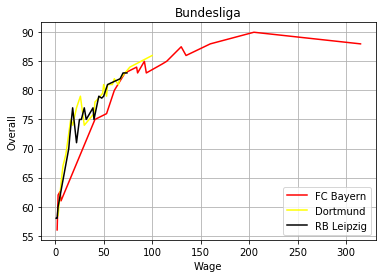

In [40]:
plt.plot(Bayern_df_average.index, Bayern_df_average['Overall'], color='red', label='FC Bayern')
plt.plot(Dortmund_df_average.index, Dortmund_df_average['Overall'], color='yellow', label='Dortmund')
plt.plot(RBL_df_average.index, RBL_df_average['Overall'], color='black', label='RB Leipzig')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Bundesliga')
plt.grid()
plt.legend()
plt.show()

In [41]:
Barca_team = data['Club'] == 'FC Barcelona'
print(Barca_team.head)
Barca_df = data[Barca_team]
print(Barca_df.shape)
Barca_df.head()
Barca_df['Wage'] = Barca_df['Wage'].str[1:]
Barca_df['Wage'] = Barca_df['Wage'].str[:-1]
Barca_df.head(33)
Barca_df.describe()
Barca_df.info()
Barca_df['Wage'] = pd.to_numeric(Barca_df['Wage'])
Barca_df_average = Barca_df.groupby('Wage').mean()

<bound method NDFrame.head of 0         True
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(33, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 14286
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [42]:
Atletico_team = data['Club'] == 'Atlético Madrid'
print(Atletico_team.head)
Atletico_df = data[Atletico_team]
print(Atletico_df.shape)
Atletico_df.head()
Atletico_df['Wage'] = Atletico_df['Wage'].str[1:]
Atletico_df['Wage'] = Atletico_df['Wage'].str[:-1]
Atletico_df.head(33)
Atletico_df.describe()
Atletico_df.info()
Atletico_df['Wage'] = pd.to_numeric(RBL_df['Wage'])
Atletico_df_average = Atletico_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(33, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 9 to 15786
Data columns (total 6 columns):
Name           33 non-null object
Age            33 non-null int64
Nationality    33 non-null object
Overall        33 non-null int64
Club           33 non-null object
Wage           33 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [43]:
Real_team = data['Club'] == 'Real Madrid'
print(RBL_team.head)
Real_df = data[RBL_team]
print(RBL_df.shape)
Real_df.head()
Real_df['Wage'] = Real_df['Wage'].str[1:]
Real_df['Wage'] = Real_df['Wage'].str[:-1]
Real_df.head(33)
Real_df.describe()
Real_df.info()
Real_df['Wage'] = pd.to_numeric(Real_df['Wage'])
Real_df_average = Real_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(28, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 167 to 16286
Data columns (total 6 columns):
Name           28 non-null object
Age            28 non-null int64
Nationality    28 non-null object
Overall        28 non-null int64
Club           28 non-null object
Wage           28 non-null object
dtypes: int64(2), object(4)
memory usage: 1.5+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

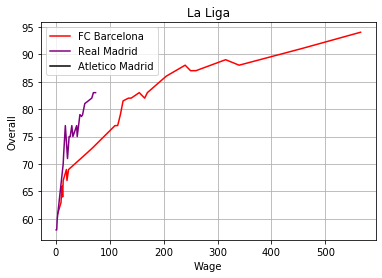

In [44]:
plt.plot(Barca_df_average.index, Barca_df_average['Overall'], color='red', label='FC Barcelona')
plt.plot(Real_df_average.index, Real_df_average['Overall'], color='purple', label='Real Madrid')
plt.plot(Atletico_df_average.index, Atletico_df_average['Overall'], color='black', label='Atletico Madrid')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('La Liga')
plt.grid()
plt.legend()
plt.show()

In [45]:
PSG_team = data['Club'] == 'Paris Saint-Germain'
print(PSG_team.head)
PSG_df = data[PSG_team]
print(PSG_df.shape)
PSG_df.head()
PSG_df['Wage'] = PSG_df['Wage'].str[1:]
PSG_df['Wage'] = PSG_df['Wage'].str[:-1]
PSG_df.head(33)
PSG_df.describe()
PSG_df.info()
PSG_df['Wage'] = pd.to_numeric(PSG_df['Wage'])
PSG_df_average = PSG_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2         True
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(30, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2 to 13290
Data columns (total 6 columns):
Name           30 non-null object
Age            30 non-null int64
Nationality    30 non-null object
Overall        30 non-null int64
Club           30 non-null object
Wage           30 non-null object
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [46]:
OM_team = data['Club'] == 'Olympique de Marseille'
print(OM_team.head)
OM_df = data[OM_team]
print(OM_df.shape)
OM_df.head()
OM_df['Wage'] = OM_df['Wage'].str[1:]
OM_df['Wage'] = OM_df['Wage'].str[:-1]
OM_df.head(33)
OM_df.describe()
OM_df.info()
OM_df['Wage'] = pd.to_numeric(OM_df['Wage'])
OM_df_average = OM_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(29, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 122 to 16257
Data columns (total 6 columns):
Name           29 non-null object
Age            29 non-null int64
Nationality    29 non-null object
Overall        29 non-null int64
Club           29 non-null object
Wage           29 non-null object
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [47]:
Lille_team = data['Club'] == 'LOSC Lille'
print(Lille_team.head)
Lille_df = data[Lille_team]
print(Lille_df.shape)
Lille_df.head()
Lille_df['Wage'] = Lille_df['Wage'].str[1:]
Lille_df['Wage'] = Lille_df['Wage'].str[:-1]
Lille_df.head(33)
Lille_df.describe()
Lille_df.info()
Lille_df['Wage'] = pd.to_numeric(Lille_df['Wage'])
Lille_df_average = Lille_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(25, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1297 to 15765
Data columns (total 6 columns):
Name           25 non-null object
Age            25 non-null int64
Nationality    25 non-null object
Overall        25 non-null int64
Club           25 non-null object
Wage           25 non-null object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

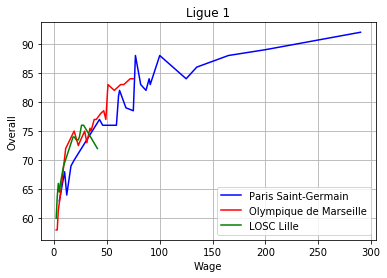

In [48]:
plt.plot(PSG_df_average.index, PSG_df_average['Overall'], color='blue', label='Paris Saint-Germain')
plt.plot(OM_df_average.index, OM_df_average['Overall'], color='red', label='Olympique de Marseille')
plt.plot(Lille_df_average.index, Lille_df_average['Overall'], color='green', label='LOSC Lille')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Ligue 1')
plt.grid()
plt.legend()
plt.show()

In [49]:
Juventus_team = data['Club'] == 'Juventus'
print(Lille_team.head)
Juventus_df = data[Juventus_team]
print(Juventus_df.shape)
Juventus_df.head()
Juventus_df['Wage'] = Juventus_df['Wage'].str[1:]
Juventus_df['Wage'] = Juventus_df['Wage'].str[:-1]
Juventus_df.head(33)
Juventus_df.describe()
Juventus_df.info()
Juventus_df['Wage'] = pd.to_numeric(Juventus_df['Wage'])
Juventus_df_average = Juventus_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(25, 6)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 13896
Data columns (total 6 columns):
Name           25 non-null object
Age            25 non-null int64
Nationality    25 non-null object
Overall        25 non-null int64
Club           25 non-null object
Wage           25 non-null object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [50]:
Inter_team = data['Club'] == 'Inter'
print(Inter_team.head)
Inter_df = data[Inter_team]
print(Inter_df.shape)
Inter_df.head()
Inter_df['Wage'] = Inter_df['Wage'].str[1:]
Inter_df['Wage'] = Inter_df['Wage'].str[:-1]
Inter_df.head(33)
Inter_df.describe()
Inter_df.info()
Inter_df['Wage'] = pd.to_numeric(Inter_df['Wage'])
Inter_df_average = Inter_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(24, 6)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 40 to 11083
Data columns (total 6 columns):
Name           24 non-null object
Age            24 non-null int64
Nationality    24 non-null object
Overall        24 non-null int64
Club           24 non-null object
Wage           24 non-null object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [51]:
Roma_team = data['Club'] == 'Roma'
print(Roma_team.head)
Roma_df = data[Roma_team]
print(Roma_df.shape)
Roma_df.head()
Roma_df['Wage'] = Roma_df['Wage'].str[1:]
Roma_df['Wage'] = Roma_df['Wage'].str[:-1]
Roma_df.head(33)
Roma_df.describe()
Roma_df.info()
Roma_df['Wage'] = pd.to_numeric(Roma_df['Wage'])
Roma_df_average = Roma_df.groupby('Wage').mean()

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Club, Length: 18207, dtype: bool>
(26, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 88 to 11573
Data columns (total 6 columns):
Name           26 non-null object
Age            26 non-null int64
Nationality    26 non-null object
Overall        26 non-null int64
Club           26 non-null object
Wage           26 non-null object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

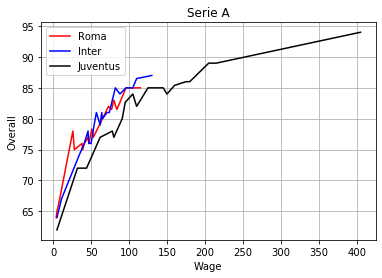

In [52]:
plt.plot(Roma_df_average.index, Roma_df_average['Overall'], color='red', label='Roma')
plt.plot(Inter_df_average.index, Inter_df_average['Overall'], color='blue', label='Inter')
plt.plot(Juventus_df_average.index, Juventus_df_average['Overall'], color='black', label='Juventus')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Serie A')
plt.grid()
plt.legend()
plt.show()

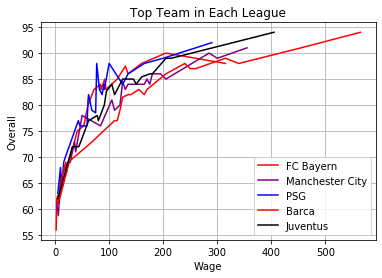

In [53]:
plt.plot(Bayern_df_average.index, Bayern_df_average['Overall'], color='red', label='FC Bayern')
plt.plot(City_df_average.index, City_df_average['Overall'], color='purple', label='Manchester City')
plt.plot(PSG_df_average.index, PSG_df_average['Overall'], color='blue', label='PSG')
plt.plot(Barca_df_average.index, Barca_df_average['Overall'], color='red', label='Barca')
plt.plot(Juventus_df_average.index, Juventus_df_average['Overall'], color='black', label='Juventus')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Top Team in Each League')
plt.grid()
plt.legend()
plt.show()

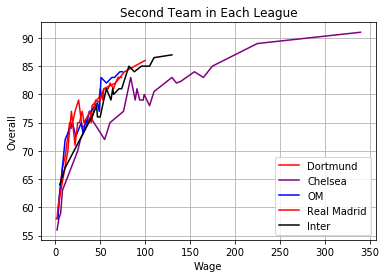

In [54]:
plt.plot(Dortmund_df_average.index, Dortmund_df_average['Overall'], color='red', label='Dortmund')
plt.plot(Chelsea_df_average.index, Chelsea_df_average['Overall'], color='purple', label='Chelsea')
plt.plot(OM_df_average.index, OM_df_average['Overall'], color='blue', label='OM')
plt.plot(Real_df_average.index, Real_df_average['Overall'], color='red', label='Real Madrid')
plt.plot(Inter_df_average.index, Inter_df_average['Overall'], color='black', label='Inter')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Second Team in Each League')
plt.grid()
plt.legend()
plt.show()

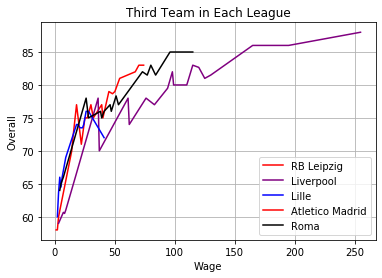

In [55]:
plt.plot(RBL_df_average.index, RBL_df_average['Overall'], color='red', label='RB Leipzig')
plt.plot(Liverpool_df_average.index, Liverpool_df_average['Overall'], color='purple', label='Liverpool')
plt.plot(Lille_df_average.index, Lille_df_average['Overall'], color='blue', label='Lille')
plt.plot(Atletico_df_average.index, Atletico_df_average['Overall'], color='red', label='Atletico Madrid')
plt.plot(Roma_df_average.index, Roma_df_average['Overall'], color='black', label='Roma')
plt.xlabel('Wage')
plt.ylabel('Overall')
plt.title('Third Team in Each League')
plt.grid()
plt.legend()
plt.show()

In [56]:
All_average_nationality = data.groupby('Nationality').mean()
All_average_nationality.sort_values('Overall', ascending=False)

,Age,Overall
Nationality,,
United Arab Emirates,26.000000,77.000000
Central African Rep.,25.666667,73.333333
Israel,28.214286,72.142857
Dominican Republic,23.000000,72.000000
São Tomé & Príncipe,31.000000,72.000000
...,...,...
South Sudan,25.000000,60.000000
China PR,26.084184,59.910714
India,24.933333,58.666667


In [57]:
data2 = data

In [58]:
data2 = data2.loc[data2['Overall'] >= 80]
data2 = data2[data2['Nationality'].map(data2['Nationality'].value_counts()) >= 20]

In [59]:
data2.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Germany', 'France',
       'England', 'Italy'], dtype=object)

In [60]:
All_average_nationality_15 = data2.groupby('Nationality').mean()
All_average_nationality_15.sort_values('Overall', ascending=False)

,Age,Overall
Nationality,,
Brazil,28.300000,83.200000
France,26.580000,82.800000
Italy,28.941176,82.794118
Germany,26.437500,82.729167
Argentina,28.545455,82.454545
Portugal,26.692308,82.423077
Spain,28.054945,82.351648
England,26.259259,81.592593


In [61]:
CapeV = data['Nationality'] == 'Cape Verde'
CapeV_df = data[CapeV]

In [62]:
CapeV_df.shape
CapeV_df.head(19)

,Name,Age,Nationality,Overall,Club,Wage
621,Zé Luís,27,Cape Verde,79,Spartak Moscow,€1K
936,Garry Rodrigues,27,Cape Verde,77,Galatasaray SK,€53K
1032,Djaniny,27,Cape Verde,77,Al Ahli,€42K
1251,Héldon,29,Cape Verde,76,Al Taawoun,€23K
1473,Varela,30,Cape Verde,76,PAOK,€1K
1639,Júlio Tavares,29,Cape Verde,75,Dijon FCO,€17K
2012,Jovane Cabral,20,Cape Verde,75,Sporting CP,€9K
2631,Carlos Ponck,23,Cape Verde,73,CD Aves,€8K
3812,Nuno da Costa,27,Cape Verde,72,RC Strasbourg Alsace,€15K
4059,Babanco,32,Cape Verde,71,CD Feirense,€8K


In [63]:
Brazil = data['Nationality'] == 'Brazil'
Brazil_df = data[Brazil]

In [64]:
Brazil_df.shape

(827, 6)

In [65]:
Brazil_df.head(30)

,Name,Age,Nationality,Overall,Club,Wage
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K
27,Casemiro,26,Brazil,88,Real Madrid,€285K
32,Coutinho,26,Brazil,88,FC Barcelona,€340K
35,Marcelo,30,Brazil,88,Real Madrid,€285K
39,Thiago Silva,33,Brazil,88,Paris Saint-Germain,€165K
57,Ederson,24,Brazil,86,Manchester City,€125K
61,Roberto Firmino,26,Brazil,86,Liverpool,€195K
64,Alex Sandro,27,Brazil,86,Juventus,€160K
65,Douglas Costa,27,Brazil,86,Juventus,€175K
75,Fernandinho,33,Brazil,86,Manchester City,€185K


In [66]:
data_05 = pd.read_csv("fifa05_2.csv", sep=',', header=0)

In [67]:
data_05.head()

,Player Name,Age
0,Thierry Henry,27
1,Gianluigi Buffon,25
2,Zinedine Zidane,32
3,Ruud van Nistelrooy,28
4,Roy Makaay,27


In [68]:
data_2019 = data.head(60)
data_2019.head(60)

,Name,Age,Nationality,Overall,Club,Wage
0,L. Messi,31,Argentina,94,FC Barcelona,€565K
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K
3,De Gea,27,Spain,91,Manchester United,€260K
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K
5,E. Hazard,27,Belgium,91,Chelsea,€340K
6,L. Modrić,32,Croatia,91,Real Madrid,€420K
7,L. Suárez,31,Uruguay,91,FC Barcelona,€455K
8,Sergio Ramos,32,Spain,91,Real Madrid,€380K
9,J. Oblak,25,Slovenia,90,Atlético Madrid,€94K


In [69]:
data_05.Age.mean()

28.166666666666668

In [70]:
data_2019.Age.mean()

28.233333333333334

In [75]:
Chelsea_df.describe()

,Age,Overall,Wage
count,33.000000,33.000000,33.000000
mean,25.212121,76.787879,98.454545
std,5.504303,9.228887,73.331478
min,17.000000,56.000000,2.000000
25%,22.000000,72.000000,39.000000
50%,25.000000,79.000000,98.000000
75%,28.000000,83.000000,140.000000
max,38.000000,91.000000,340.000000


In [77]:
City_df.describe()

,Age,Overall,Wage
count,33.000000,33.000000,33.000000
mean,23.909091,76.727273,113.363636
std,5.198339,10.946668,95.428906
min,17.000000,54.000000,3.000000
25%,19.000000,69.000000,24.000000
50%,23.000000,81.000000,120.000000
75%,27.000000,85.000000,175.000000
max,35.000000,91.000000,355.000000


In [93]:
Liverpool_df.describe()


,Age,Overall,Wage
count,33.000000,33.000000,33.000000
mean,24.000000,76.000000,87.939394
std,3.864906,9.283722,62.824627
min,17.000000,59.000000,3.000000
25%,21.000000,70.000000,36.000000
50%,24.000000,80.000000,94.000000
75%,26.000000,82.000000,120.000000
max,32.000000,88.000000,255.000000


In [ ]:
#Mean of overall equals 76.50
#Mean of wage equals 99.9

In [78]:
Dortmund_df.describe()

,Age,Overall,Wage
count,33.000000,33.000000,33.000000
mean,23.090909,75.333333,38.121212
std,4.543977,8.045444,24.758531
min,17.000000,57.000000,3.000000
25%,19.000000,74.000000,16.000000
50%,22.000000,79.000000,43.000000
75%,27.000000,81.000000,54.000000
max,33.000000,86.000000,100.000000


In [79]:
Bayern_df.describe()

,Age,Overall,Wage
count,29.000000,29.000000,29.000000
mean,24.310345,77.000000,78.827586
std,5.451759,11.090537,71.447818
min,17.000000,56.000000,2.000000
25%,19.000000,64.000000,5.000000
50%,23.000000,83.000000,85.000000
75%,29.000000,85.000000,110.000000
max,35.000000,90.000000,315.000000


In [80]:
RBL_df.describe()

,Age,Overall,Wage
count,28.000000,28.000000,28.000000
mean,22.178571,73.107143,30.964286
std,3.443228,8.243243,21.955312
min,18.000000,57.000000,1.000000
25%,19.000000,70.000000,14.750000
50%,22.000000,75.000000,28.500000
75%,24.250000,79.000000,48.000000
max,29.000000,83.000000,74.000000


In [ ]:
#Mean of overall equals 75.14
#Mean of wage equals 49.30

In [81]:
PSG_df.describe()

,Age,Overall,Wage
count,30.000000,30.000000,30.000000
mean,24.566667,77.433333,72.033333
std,5.733647,9.023660,64.116534
min,17.000000,62.000000,5.000000
25%,19.250000,69.250000,16.750000
50%,24.500000,79.500000,65.000000
75%,26.750000,83.750000,90.750000
max,40.000000,92.000000,290.000000


In [84]:
OM_df.describe()

,Age,Overall,Wage
count,29.000000,29.000000,29.000000
mean,25.620690,73.827586,33.310345
std,4.916545,7.833394,21.645032
min,18.000000,58.000000,2.000000
25%,21.000000,72.000000,19.000000
50%,25.000000,75.000000,34.000000
75%,30.000000,78.000000,47.000000
max,35.000000,84.000000,75.000000


In [94]:
Lille_df.describe()

,Age,Overall,Wage
count,25.000000,25.000000,25.000000
mean,22.000000,69.640000,14.360000
std,2.813657,5.122499,10.250528
min,18.000000,59.000000,2.000000
25%,20.000000,65.000000,5.000000
50%,21.000000,72.000000,12.000000
75%,23.000000,74.000000,21.000000
max,29.000000,76.000000,41.000000


In [ ]:
#Mean of overall equals 73.63
#Mean of wage equals 39.90

In [95]:
Juventus_df.describe()

,Age,Overall,Wage
count,25.000000,25.000000,25.000000
mean,27.160000,82.280000,131.680000
std,4.642916,6.560742,78.196718
min,18.000000,62.000000,5.000000
25%,24.000000,80.000000,91.000000
50%,27.000000,84.000000,125.000000
75%,31.000000,86.000000,160.000000
max,37.000000,94.000000,405.000000


In [96]:
Inter_df.describe()

,Age,Overall,Wage
count,24.000000,24.000000,24.000000
mean,27.458333,79.750000,66.500000
std,4.010629,5.704689,30.233871
min,20.000000,64.000000,5.000000
25%,24.000000,77.500000,49.250000
50%,26.000000,81.000000,63.500000
75%,30.250000,84.250000,83.500000
max,35.000000,88.000000,130.000000


In [97]:
Roma_df.describe()


,Age,Overall,Wage
count,26.000000,26.000000,26.000000
mean,25.653846,77.423077,53.807692
std,5.122049,6.060845,29.686386
min,18.000000,64.000000,4.000000
25%,21.250000,76.000000,38.250000
50%,27.000000,78.000000,51.000000
75%,29.000000,82.000000,76.000000
max,34.000000,85.000000,115.000000


In [ ]:
#Mean of overall equals 79.81
#Mean of wage equals 83.99

In [90]:
Barca_df.describe()

,Age,Overall,Wage
count,33.000000,33.000000,33.000000
mean,23.848485,78.030303,146.575758
std,4.711165,9.583465,134.515573
min,18.000000,61.000000,4.000000
25%,19.000000,69.000000,21.000000
50%,23.000000,82.000000,125.000000
75%,29.000000,87.000000,205.000000
max,32.000000,94.000000,565.000000


In [91]:
Real_df.describe()

,Age,Overall,Wage
count,28.000000,28.000000,28.000000
mean,22.178571,73.107143,30.964286
std,3.443228,8.243243,21.955312
min,18.000000,57.000000,1.000000
25%,19.000000,70.000000,14.750000
50%,22.000000,75.000000,28.500000
75%,24.250000,79.000000,48.000000
max,29.000000,83.000000,74.000000


In [92]:
Atletico_df.describe()

,Age,Overall,Wage
count,33.000000,33.000000,0.0
mean,23.757576,75.060606,NaN
std,4.520995,10.945717,NaN
min,17.000000,59.000000,NaN
25%,20.000000,63.000000,NaN
50%,23.000000,81.000000,NaN
75%,27.000000,83.000000,NaN
max,33.000000,90.000000,NaN


In [ ]:
#Mean of overall equals 75.33
#Mean of wage equals 80.50